<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/ProyectoFakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
fake_news = pd.read_csv('Fake.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# Crear un nuevo dataframe sólo con el texto de cada noticia
fake = fake_news[['text']]
# Agregar una nueva columna llamada "etiqueta" con el valor 1 para cada fila
fake['etiqueta'] = 1
fake.head()

<ipython-input-3-7935d54ca840>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake['etiqueta'] = 1


,text,etiqueta
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [ ]:
true_news = pd.read_csv('True.csv')
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Crear un nuevo dataframe sólo con el texto de cada noticia
true = true_news[['text']]
# Agregar una nueva columna llamada "etiqueta" con el valor 0 para cada fila
true['etiqueta'] = 0
true.head()

<ipython-input-5-1389e3e30f4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['etiqueta'] = 0


,text,etiqueta
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [ ]:
# Unir DataFrames por las columnas 'text' y 'etiqueta'
news = pd.merge(fake, true, on=['text', 'etiqueta'], how='outer')
news.head()

,text,etiqueta
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [ ]:
true.shape, fake.shape, news.shape

((21417, 2), (23481, 2), (44898, 2))

In [ ]:
# Dividir el DataFrame en características (X) y etiquetas (y)
X = news['text']
y = news['etiqueta']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35918,), (8980,), (35918,), (8980,))

In [ ]:
# El proceso de Bag of Words (BoW) se aplica a través del uso de la clase CountVectorizer de scikit-learn
BoW = CountVectorizer()

X_train_b = BoW.fit_transform(X_train)
X_test_b = BoW.transform(X_test)

In [ ]:
clf = MultinomialNB()

# Entrenamiento del clasificador
clf = clf.fit(X_train_b, y_train)

# Hacer predicciones en el conjunto de prueba
pred = clf.predict(X_test_b)

In [ ]:
y_test

41686    0
18804    1
7967     1
30472    0
35606    0
        ..
27022    0
30955    0
42479    0
36030    0
14553    1
Name: etiqueta, Length: 8980, dtype: int64

In [ ]:
pred

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
#Accuracy
acc= accuracy_score(y_test, pred)
print("Accuracy del clasificador :", acc)

Accuracy del clasificador : 0.9526726057906458


In [ ]:
# Genera el reporte de clasificación
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4351
           1       0.96      0.95      0.95      4629

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



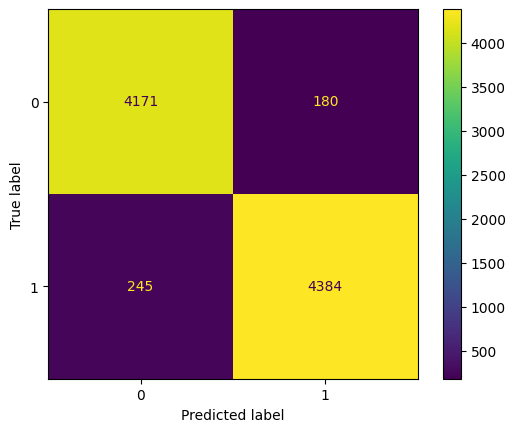

In [ ]:
# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, pred)

# Método 2

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd
#from utils import process_tweet, build_freqs

ImportError: ignored

In [ ]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
# Convertir X_train y X_test a listas
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

# Mostrar las formas de los conjuntos resultantes
print("Forma de X_train_list:", len(X_train_list))
print("Forma de X_test_list:", len(X_test_list))

Forma de X_train_list: 35918
Forma de X_test_list: 8980


In [ ]:
#Convertir a  NumPy arrays
y_train = y_train.values
y_test = y_test.values

In [ ]:
# create frequency dictionary
freqs = build_freqs(X_train_list, y_train)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 173454


## Regresión logística

In [ ]:
def sigmoid(z):
  '''
  Input: z: is the input (can be a scalar or an array)
  Output: h: the sigmoid of z
  '''
  h = 1/(1+np.exp(-z))
  return h

In [ ]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    m = len(y) # y tiene dimensión m

    for i in range(0, num_iters):
        z = np.dot(x,theta)

        # get the sigmoid of z:
        h = 1/(1+np.exp(-z))

        # calculate the cost function:
        J = (-1/m) * (np.dot(y.T,np.log(h)) + np.dot((1 - y).T,np.log(1 - h)))

        # update the weights theta:
        theta = theta - alpha/m * np.dot(x.T,(h-y))

    J = float(J)
    return J, theta

In [ ]:
def extract_features(tweet, freqs):
    '''
    Input:
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output:
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)

    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    #bias term is set to 1
    x[0,0] = 1

    # loop through each word in the list of words:
    for word in word_l:
        pair_pos= (word,1.0)
        pair_neg= (word,0.0)
        # increment the word count for the positive label 1:
        x[0, 1] += freqs.get(pair_pos, 0)
        # increment the word count for the negative label 0:
        x[0, 2] += freqs.get(pair_neg, 0)

    assert(x.shape == (1, 3))
    return x

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(X_train_list), 3))
for i in range(len(X_train_list)):
  X[i, :]= extract_features(X_train_list[i], freqs)

# training labels corresponding to X
Y = y_train

# Apply gradient descent
# gradientDescent(x, y, theta, alpha, num_iters)
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

In [ ]:
#Se usa sólo si queremos ver y_pred
def predict_tweet(tweet, freqs, theta):
    '''
    Input:
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output:
        y_pred: the probability of a tweet being positive or negative
    '''
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)

    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))

    return y_pred

In [ ]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input:
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output:
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # the list for storing predictions
    y_hat = []

    for tweet in test_x:
        # get the label prediction for the tweet:
        x = extract_features(tweet, freqs)
        y_pred = sigmoid(np.dot(x,theta)) #None

        if y_pred > 0.5:
            # append 1.0 to the list:
            y_hat.append(1.0) #None
        else:
            # append 0 to the list:
            y_hat.append(0.0) #None

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator

    accuracy = (np.sum(np.array(test_y)==np.vstack(np.array(y_hat)))/len(y_hat))

    ### END CODE HERE ###

    return accuracy

In [ ]:
lr_accuracy = test_logistic_regression(X_test_list, y_test, freqs, theta)
print(f"Logistic regression model's accuracy = {lr_accuracy:.4f}")

# Otros

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbors = 5
model = KNeighborsClassifier(n_neighbors=k_neighbors)
model

KNeighborsClassifier()

In [ ]:
from sklearn.svm import SVC
model = SVC(C = 0.5, kernel = 'poly')
model

SVC(C=0.5, kernel='poly')

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100.0)
model

LogisticRegression(C=100.0)